In [1]:
from keras.datasets import imdb
import numpy as np

Using TensorFlow backend.


## Data Preparation

In [2]:
((XT,YT),(Xt,Yt)) = imdb.load_data(num_words=10000)

In [3]:
print(len(XT))
print(len(Xt))

25000
25000


In [4]:
print(XT[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
word_idx = imdb.get_word_index()

In [6]:
# print(word_idx.items())

In [7]:
idx_word = dict((val,key) for (key,val) in word_idx.items())

In [8]:
# print(idx_word.items())

In [9]:
actual_review = ' '.join([idx_word.get(idx-3,'?') for idx in XT[0]]) # ? is when there is no value present at that idx 

In [10]:
print(actual_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

## Vectorizing the data
### Vocab size - 10000, we make sure that each sentence is represented by a vector of len 10000 [000000111100111......110]

In [11]:
def vectorize_sentences(sen,dim=10000):
    outputs = np.zeros((len(sen),dim))
    for i,idx in enumerate(sen):
        outputs[i,idx] = 1
    return outputs

In [12]:
X_train = vectorize_sentences(XT)
X_test = vectorize_sentences(Xt)

In [13]:
print(X_train.shape,X_test.shape)

(25000, 10000) (25000, 10000)


In [14]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [15]:
Y_train = np.asarray(YT).astype('float32')
Y_test = np.asarray(Yt).astype('float32')

In [16]:
print(Y_train.shape,Y_test.shape)

(25000,) (25000,)


## Building the network

In [17]:
from keras import models
from keras.layers import Dense

In [18]:
# Define the model
model = models.Sequential()
model.add(Dense(16,activation='relu',input_shape=(10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [19]:
# Compile the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=["accuracy"])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


## Training And Validation

In [21]:
X_val = X_train[:5000]
X_train_new = X_train[5000:]
Y_val = Y_train[:5000]
Y_train_new = Y_train[5000:]

In [22]:
his = model.fit(X_train_new,Y_train_new,epochs=10,batch_size=512,validation_data=(X_val,Y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 5s 272us/step - loss: 0.4866 - accuracy: 0.8019 - val_loss: 0.3580 - val_accuracy: 0.8752
Epoch 2/10
20000/20000 [==============================] - 4s 216us/step - loss: 0.2841 - accuracy: 0.9041 - val_loss: 0.3126 - val_accuracy: 0.8752
Epoch 3/10
20000/20000 [==============================] - 4s 215us/step - loss: 0.2109 - accuracy: 0.9281 - val_loss: 0.2706 - val_accuracy: 0.8920
Epoch 4/10
20000/20000 [==============================] - 4s 224us/step - loss: 0.1736 - accuracy: 0.9398 - val_loss: 0.2800 - val_accuracy: 0.8904
Epoch 5/10
20000/20000 [==============================] - 5s 234us/step - loss: 0.1455 - accuracy: 0.9514 - val_loss: 0.2984 - val_accuracy: 0.8834
Epoch 6/10
20000/20000 [==============================] - 4s 221us/step - loss: 0.1238 - accuracy: 0.9587 - val_loss: 0.3431 - val_accuracy: 0.8750
Epoch 7/10
20000/20000 [==============================] - 4s 21

## Visualize our results

In [23]:
import matplotlib.pyplot as plt

In [24]:
h = his.history

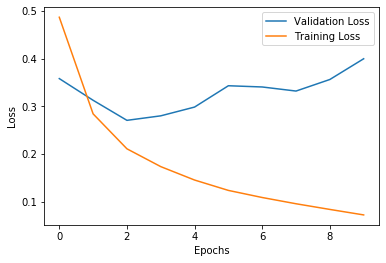

In [25]:
plt.plot(h['val_loss'],label="Validation Loss")
plt.plot(h['loss'],label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

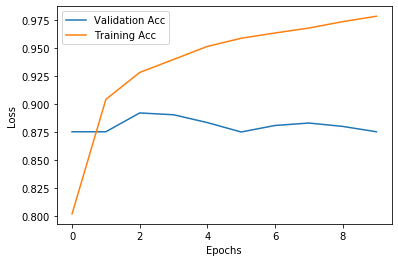

In [26]:
plt.plot(h['val_accuracy'],label="Validation Acc")
plt.plot(h['accuracy'],label="Training Acc")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [27]:
loss,acc = model.evaluate(X_test,Y_test)

25000/25000 [==============================] - 7s 289us/step


In [28]:
print(acc)
print(loss)

0.8629199862480164
0.43985361795425415


In [29]:
model.evaluate(X_train,Y_train)

25000/25000 [==============================] - 7s 287us/step


[0.13260714104413987, 0.959559977054596]

In [31]:
pred = model.predict(X_test)

In [32]:
type(pred)

numpy.ndarray

In [ ]:
pred[]